## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [130]:
import pandas as pd
import numpy as np
stud=pd.read_csv("C:\\Users\\shanmugapriya.p\\Downloads\\studentsdataset.csv",sep=";")

In [18]:
stud.shape

(395, 33)

In [19]:
stud.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [25]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [53]:
categorical=stud.select_dtypes(exclude="number")
print (categorical)

    school sex address famsize Pstatus      Mjob      Fjob      reason  \
0       GP   F       U     GT3       A   at_home   teacher      course   
1       GP   F       U     GT3       T   at_home     other      course   
2       GP   F       U     LE3       T   at_home     other       other   
3       GP   F       U     GT3       T    health  services        home   
4       GP   F       U     GT3       T     other     other        home   
5       GP   M       U     LE3       T  services     other  reputation   
6       GP   M       U     LE3       T     other     other        home   
7       GP   F       U     GT3       A     other   teacher        home   
8       GP   M       U     LE3       A  services     other        home   
9       GP   M       U     GT3       T     other     other        home   
10      GP   F       U     GT3       T   teacher    health  reputation   
11      GP   F       U     GT3       T  services     other  reputation   
12      GP   M       U     LE3       T

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [84]:
p=stud.select_dtypes(include="number")

In [39]:
p.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [40]:
p.drop(p.columns[p.apply(lambda col: col.var()<1)],axis=1)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
0,18,4,4,4,1,3,6,5,6,6
1,17,1,1,3,1,3,4,5,5,6
2,15,1,1,2,3,3,10,7,8,10
3,15,4,2,2,1,5,2,15,14,15
4,16,3,3,2,2,5,4,6,10,10
5,16,4,3,2,2,5,10,15,15,15
6,16,2,2,4,1,3,0,12,12,11
7,17,4,4,4,1,1,6,6,5,6
8,15,3,2,2,1,1,0,16,18,19
9,15,3,4,1,1,5,0,14,15,15


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
stud.school=le.fit_transform(stud.school)
stud.sex=le.fit_transform(stud.sex)
stud.address=le.fit_transform(stud.address)
stud.famsize=le.fit_transform(stud.famsize)
stud.Pstatus=le.fit_transform(stud.Pstatus)
stud.Mjob=le.fit_transform(stud.Mjob)
stud.Fjob=le.fit_transform(stud.Fjob)
stud.reason=le.fit_transform(stud.reason)
stud.guardian=le.fit_transform(stud.guardian)
stud.schoolsup=le.fit_transform(stud.schoolsup)
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [90]:
import numpy as np
stud['G1'] = stud['G1'].apply(lambda x:0 if x< 10 else 1)
stud['G2'] = stud['G2'].apply(lambda x:0 if x< 10 else 1)
stud['G3'] = stud['G3'].apply(lambda x:0 if x< 10 else 1)
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [104]:
X=stud.drop(['G3'], axis=1)
Y=stud['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

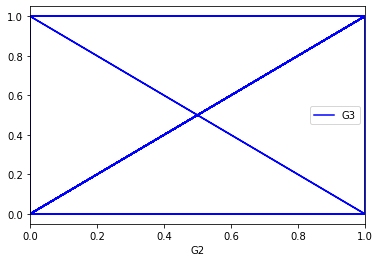

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
stud.plot(kind='line',x='G2',y='G3',color='blue')
plt.show()


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

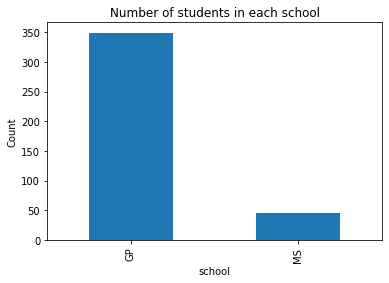

In [99]:
pd.Series(stud['school']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("school")
plt.title('Number of students in each school');

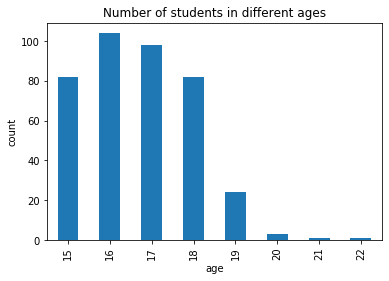

In [100]:
pd.Series(stud['age']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("count")
plt.xlabel("age")
plt.title('Number of students in different ages');

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [127]:
X=stud.drop(['G3'], axis=1)
Y=stud['G3']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2342,random_state=0)
X_train.shape,X_test.shape

((302, 32), (93, 32))

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [21]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
stud=pd.read_csv("C:\\Users\\shanmugapriya.p\\Downloads\\studentsdataset.csv",sep=";")
stud=stud.select_dtypes(include='number')
stud.drop(stud1.columns[stud1.apply(lambda col: col.var()<1)],axis=1,inplace=True)
lastindex=len(stud.columns)-1
Y=stud.iloc[:,lastindex:]
X=stud.iloc[:,0:lastindex]

X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2341,random_state=0)
model=LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\shanmugapriya.p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shanmugapriya.p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanmugapriya.p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
prediction=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction)

0.3548387096774194

In [31]:
from sklearn.metrics import f1_score
f1_score(Y_test, prediction,average='macro')

0.22859667565549918

# Naive bayes with Iris data

### Import Iris.csv

In [33]:
import pandas as pd
import numpy as np
iris=pd.read_csv("C:\\Users\\shanmugapriya.p\\Downloads\\iris2.csv")

In [137]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [138]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [140]:
y = iris.iloc[:,5]
X = iris.iloc[:,0:4]

### Find the distribution of target variable (Class)

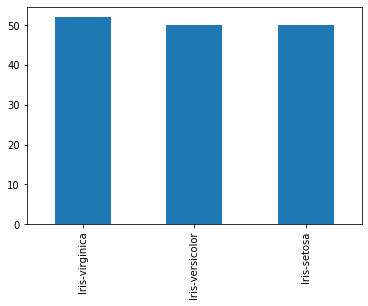

In [34]:
import seaborn as sns
pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot the distribution of target variable using histogram

Text(0.5, 0, 'Species')

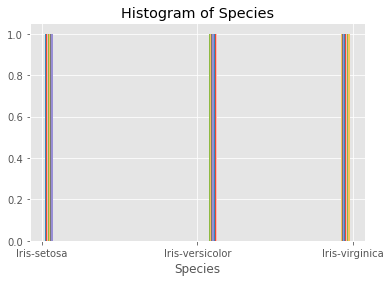

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
iris.Species.hist()
plt.title('Histogram of Species')
plt.xlabel('Species')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\shanmugapriya.p\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shanmugapriya.p\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


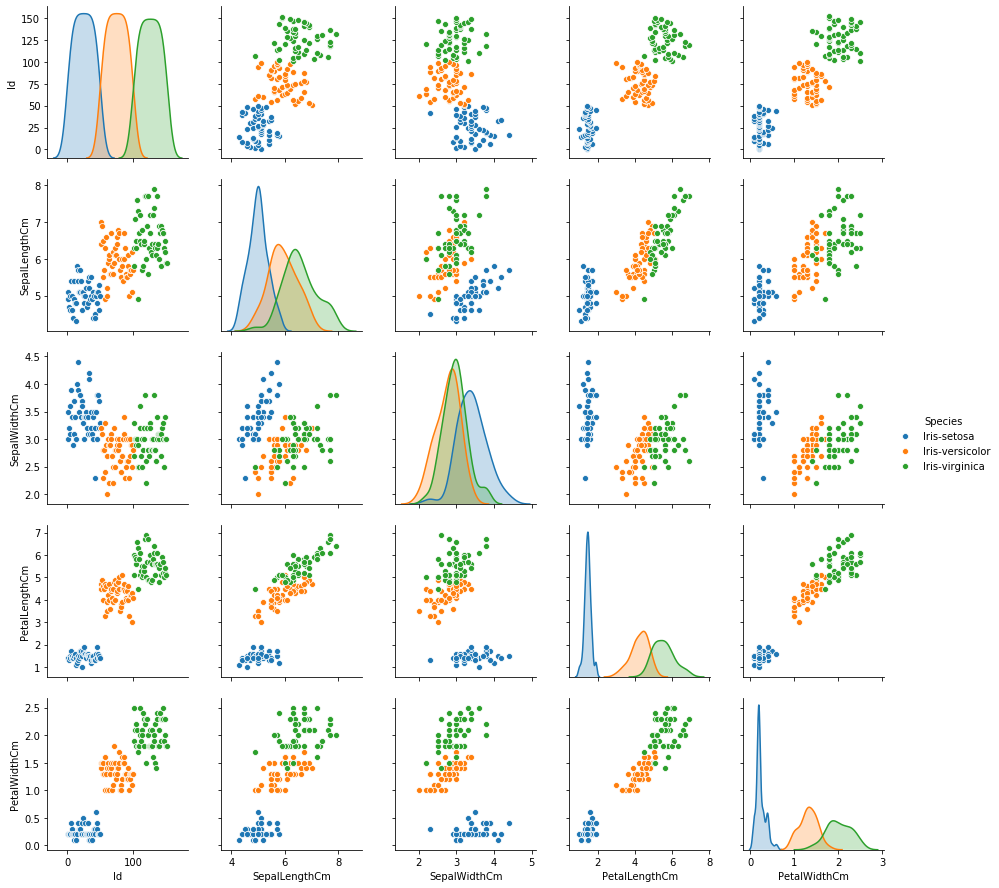

In [158]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(iris,diag_kind='kde',hue='Species')

In [ ]:
# 1.Petal length & Petal width of Iris setosa is considerably less than other two species; 
#2.Iris virginica is a large flower considerably with respect to all the four features

### Summary Statistics and explain insights for at least 2 variables

In [163]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [0]:
# Max Sepallength is 7.9 cm and minimum Sepallength is 4.3cm
#Max PetalLength is 6.9 cm and Minimum PetalLength is 1cm

### Correlation among all variables and give your insights

In [164]:
iris.corr(method ='pearson') 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.710342,-0.397729,0.882747,0.897900
SepalLengthCm,0.710342,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.897900,0.817954,-0.356544,0.962757,1.000000


In [ ]:
# petal length & Petal width has high correlation
#Sepal length & petal width has next highest correlation

### Split data in Training and Validation in 80:20

In [53]:
iris.fillna(0,inplace=True)
X=iris.drop(['Species'], axis=1)
Y=iris['Species']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2,random_state=0)

### Do Feature Scaling

In [54]:
iris.drop('Id',axis=1)
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Train and Fit NaiveBayes Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
iris.Species=le.fit_transform(iris.Species)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model= model.fit(X_train, Y_train)

In [58]:
y_pred_GNB=model.predict(X_test)

In [59]:
y_pred_GNB

array([1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 2, 0, 1, 0], dtype=int64)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_GNB)

1.0

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_GNB)
print(confusion_matrix)

[[10  0  0]
 [ 0  8  0]
 [ 0  0 13]]


In [ ]:
#This model is the best model since the accuracy is 100%, which is proved in confusion matrix of the test data set also.